In [1]:
# Import dependecies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [2]:
# Read in data
csv_path = os.path.join("../data/Police_Department_Incident_Reports.csv")
crime_df = pd.read_csv(csv_path)

# Show first 10 rows of DataFrame
crime_df.head(10)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,2023/03/13 11:41:00 PM,125373607041,1253736,230167874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,2023/03/13 01:17:00 PM,125357107041,1253571,220343896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,2023/03/13 11:00:00 AM,125355107041,1253551,230174885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023/02/15 03:00:00 AM,2023/02/15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023/03/11 12:30:00 PM,2023/03/11,12:30,2023,Saturday,2023/03/12 04:15:00 PM,125381606244,1253816,236046004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2023/03/13 11:26:00 AM,2023/03/13,11:26,2023,Monday,2023/03/13 01:37:00 PM,125419506244,1254195,236046850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023/03/11 03:00:00 PM,2023/03/11,15:00,2023,Saturday,2023/03/13 08:29:00 AM,125420606244,1254206,236045937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023/03/11 02:00:00 PM,2023/03/11,14:00,2023,Saturday,2023/03/15 11:21:00 AM,125431804134,1254318,230182844,230741133.0,...,-122.454285,POINT (-122.45428511766733 37.772895177200766),NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0


In [3]:
# Check that data was successfully imported by counting rows
num_rows = len(crime_df)
print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 850895


In [4]:
# Determine datatypes for each column
print(crime_df.dtypes)

Incident Datetime                                        object
Incident Date                                            object
Incident Time                                            object
Incident Year                                             int64
Incident Day of Week                                     object
Report Datetime                                          object
Row ID                                                    int64
Incident ID                                               int64
Incident Number                                           int64
CAD Number                                              float64
Report Type Code                                         object
Report Type Description                                  object
Filed Online                                             object
Incident Code                                             int64
Incident Category                                        object
Incident Subcategory                    

In [5]:
# Drop unwanted columns and corss-reference to original DataFrame
print("Original DataFrame:")
print("-------------------")
print(crime_df.dtypes)

columns_to_drop = ['Report Datetime',
                   'Row ID',
                   'Incident ID',
                   'Incident Number',
                   'CAD Number',
                   'Report Type Code',
                   'Report Type Description',
                   'Filed Online',
                   'Incident Code',
                   'Intersection',
                   'CNN',
                   'Police District',
                   'Supervisor District',
                   'Supervisor District 2012',
                   'Point',
                   'Neighborhoods',
                   'ESNCAG - Boundary File',
                   'Central Market/Tenderloin Boundary Polygon - Updated',
                   'Civic Center Harm Reduction Project Boundary',
                   'HSOC Zones as of 2018-06-05',
                   'Invest In Neighborhoods (IIN) Areas',
                   'Current Supervisor Districts',
                   'Current Police Districts']

crime_new_df = crime_df.drop(columns=columns_to_drop)

print("\nNew DataFrame:")
print("-------------------")
print(crime_new_df.dtypes)

Original DataFrame:
-------------------
Incident Datetime                                        object
Incident Date                                            object
Incident Time                                            object
Incident Year                                             int64
Incident Day of Week                                     object
Report Datetime                                          object
Row ID                                                    int64
Incident ID                                               int64
Incident Number                                           int64
CAD Number                                              float64
Report Type Code                                         object
Report Type Description                                  object
Filed Online                                             object
Incident Code                                             int64
Incident Category                                        object


In [6]:
# View new DataFrame
crime_new_df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude
0,2023/03/13 11:41:00 PM,2023/03/13,23:41,2023,Monday,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,NaN
1,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",Open or Active,NaN,NaN,NaN
2,2023/03/13 01:16:00 PM,2023/03/13,13:16,2023,Monday,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,NaN
3,2023/03/13 10:59:00 AM,2023/03/13,10:59,2023,Monday,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,NaN
4,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,NaN,NaN,NaN


In [7]:

# Remove rows with null values for latitude, longitude, and analysis neighborhood
crime_new_df = crime_new_df.dropna(subset=['Longitude', 'Latitude', 'Analysis Neighborhood'])
crime_new_df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude
9,2023/03/11 02:00:00 PM,2023/03/11,14:00,2023,Saturday,Assault,Simple Assault,Battery,Open or Active,Golden Gate Park,37.772895,-122.454285
11,2022/06/27 12:00:00 PM,2022/06/27,12:00,2022,Monday,Lost Property,Lost Property,Lost Property,Open or Active,Financial District/South Beach,37.787359,-122.408227
13,2023/03/16 05:30:00 PM,2023/03/16,17:30,2023,Thursday,Assault,Simple Assault,Battery,Open or Active,Potrero Hill,37.762290,-122.401324
33,2023/03/21 03:50:00 PM,2023/03/21,15:50,2023,Tuesday,Non-Criminal,Non-Criminal,Aided Case,Open or Active,Tenderloin,37.787038,-122.418271
61,2021/08/22 09:40:00 AM,2021/08/22,09:40,2021,Sunday,Warrant,Other,Probation Search,Open or Active,Pacific Heights,37.793977,-122.429804


In [8]:
# Find the different incident types, count each occurance in dataset
unique_counts = crime_new_df["Incident Category"].value_counts()
unique_incidents_df = pd.DataFrame(unique_counts.items(), columns=["Unique_Values", "Counts"])

# Display the categories and their counts
unique_incidents_df

,Unique_Values,Counts
0,Larceny Theft,232067
1,Other Miscellaneous,57580
2,Malicious Mischief,55053
3,Assault,52032
4,Non-Criminal,48838
5,Burglary,46693
6,Motor Vehicle Theft,45541
7,Fraud,27057
8,Recovered Vehicle,24489
9,Warrant,24219


In [10]:
# List of categories to remove
categories_to_remove = [
    'Non-Criminal', 'Case-Closure', 'Vehicle-Misplaced',
    'Suicide', 'Civil Sidewalks', 'Traffic Collision', 'Liquor Laws'
]

# Remove rows where 'Incident Category' is in the list of categories to remove
crime_new_df = crime_new_df[~crime_new_df['Incident Category'].isin(categories_to_remove)]

# Display the DataFrame to confirm the changes
crime_new_df.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude
9,2023/03/11 02:00:00 PM,2023/03/11,14:00,2023,Saturday,Assault,Simple Assault,Battery,Open or Active,Golden Gate Park,37.772895,-122.454285
11,2022/06/27 12:00:00 PM,2022/06/27,12:00,2022,Monday,Lost Property,Lost Property,Lost Property,Open or Active,Financial District/South Beach,37.787359,-122.408227
13,2023/03/16 05:30:00 PM,2023/03/16,17:30,2023,Thursday,Assault,Simple Assault,Battery,Open or Active,Potrero Hill,37.762290,-122.401324
61,2021/08/22 09:40:00 AM,2021/08/22,09:40,2021,Sunday,Warrant,Other,Probation Search,Open or Active,Pacific Heights,37.793977,-122.429804
87,2022/07/02 10:53:00 PM,2022/07/02,22:53,2022,Saturday,Assault,Simple Assault,Battery,Open or Active,Bayview Hunters Point,37.719298,-122.390020


In [11]:
# Count the total incidents for each 'Analysis Neighborhood'
neighborhood_incident_counts = crime_new_df['Analysis Neighborhood'].value_counts()

# Display the counts
print(neighborhood_incident_counts)

Analysis Neighborhood
Mission                           80468
Tenderloin                        77583
South of Market                   61165
Financial District/South Beach    59672
Bayview Hunters Point             50684
North Beach                       25462
Western Addition                  24784
Sunset/Parkside                   22313
Nob Hill                          21744
Castro/Upper Market               21305
Marina                            21176
Hayes Valley                      20987
Russian Hill                      18324
Outer Richmond                    17162
West of Twin Peaks                15471
Bernal Heights                    14522
Pacific Heights                   13647
Chinatown                         13542
Mission Bay                       13126
Excelsior                         12985
Potrero Hill                      12964
Haight Ashbury                    11687
Outer Mission                     11137
Lakeshore                         10046
Inner Richmond    

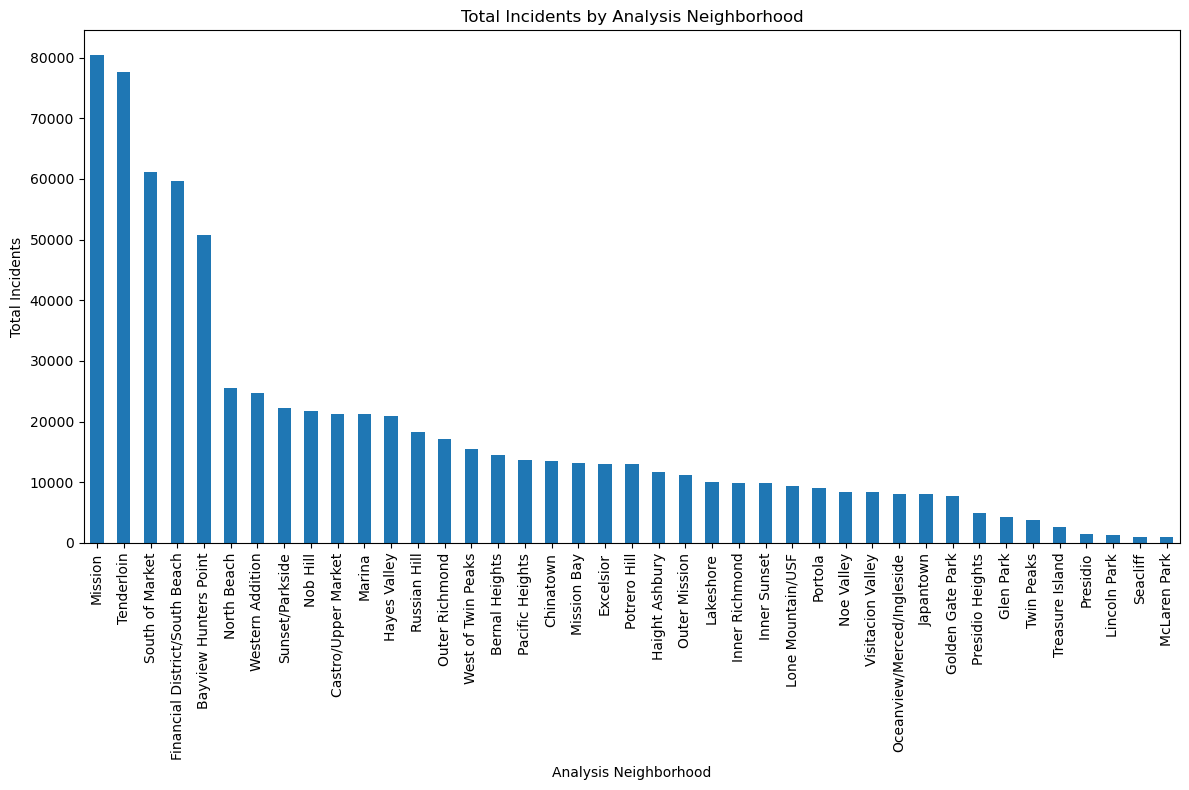

In [12]:
# Bar chart to show least safe neighborhoods SF

# Plot the bar chart
plt.figure(figsize=(12, 8))
neighborhood_incident_counts.plot(kind='bar')
plt.title('Total Incidents by Analysis Neighborhood')
plt.xlabel('Analysis Neighborhood')
plt.ylabel('Total Incidents')
plt.xticks(rotation=90) 
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
# Find the top 10 neighborhoods with the most incidents
top_neighborhood_crime_counts = crime_new_df['Analysis Neighborhood'].value_counts().nlargest(10)

In [18]:
# List of neighborhoods with the most amount of incidents, convert to DF
least_safe_neighborhoods_df = pd.DataFrame(top_neighborhood_crime_counts)

print("Neighborhoods with the most amount of incidents:")
least_safe_neighborhoods_df.head(10)

Neighborhoods with the most amount of incidents:


,count
Analysis Neighborhood,
Mission,80468
Tenderloin,77583
South of Market,61165
Financial District/South Beach,59672
Bayview Hunters Point,50684
North Beach,25462
Western Addition,24784
Sunset/Parkside,22313
Nob Hill,21744


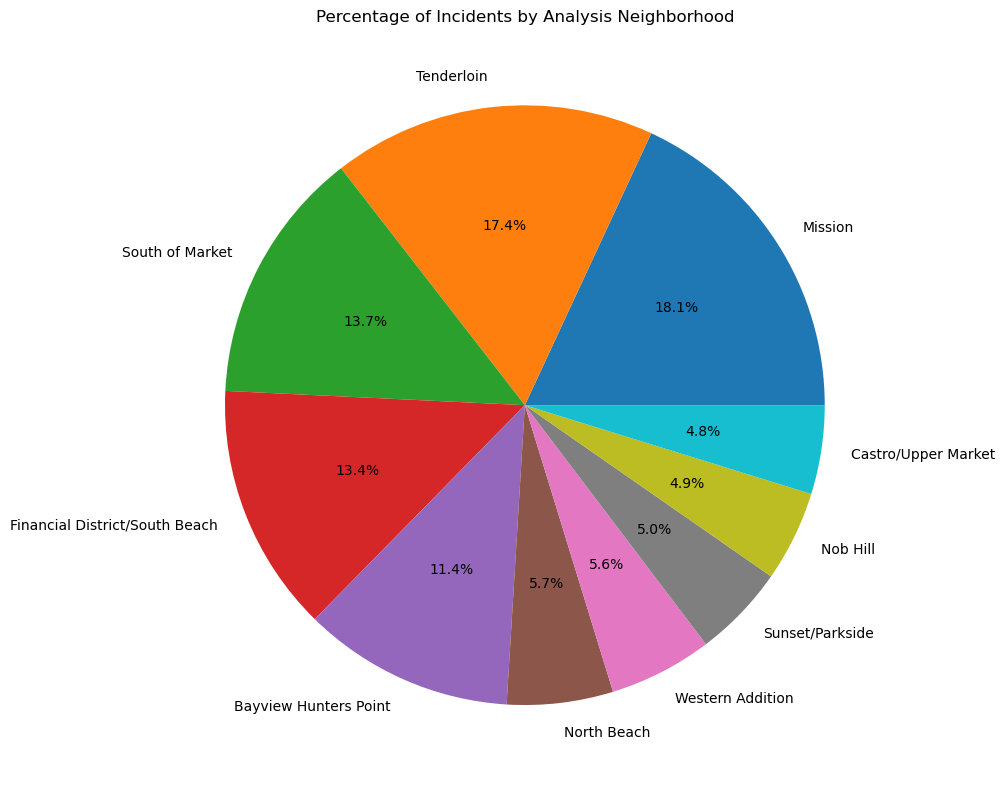

In [15]:
# Pie chart to show the top 10 neighborhoods with the most incidents

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_neighborhood_crime_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Incidents by Analysis Neighborhood')
plt.ylabel('')
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Find the safest neighborhoods in San Francisco
neighborhoods_least_incidents = neighborhood_incident_counts.nsmallest(10) 

safe_neighborhoods_df = pd.DataFrame(neighborhoods_least_incidents)

# Display the neighborhoods with the least amount of incidents
print("Neighborhoods with the least amount of incidents:")
safe_neighborhoods_df.head(10)

Neighborhoods with the least amount of incidents:


,count
Analysis Neighborhood,
McLaren Park,952
Seacliff,1011
Lincoln Park,1272
Presidio,1560
Treasure Island,2700
Twin Peaks,3818
Glen Park,4291
Presidio Heights,5022
Golden Gate Park,7813


In [17]:
# Create new DataFrames for yearly data analysis

# List of years to access from df
years = [2019, 2020, 2021, 2022, 2023, 2024]

# Create dictionary to hold DataFrames for each year
crime_df_by_year = {}

# Create a new DataFrame for each year and store in the dictionary
for year in years:
    crime_df_by_year[year] = crime_new_df[crime_new_df['Incident Year'] == year]

# Display the DataFrame for 2024 to confirm
crime_df_2024 = crime_df_by_year[2024]
crime_df_2024.head(5)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude
1786,2024/05/02 01:00:00 AM,2024/05/02,01:00,2024,Thursday,Other Miscellaneous,Trespass,Trespassing,Open or Active,McLaren Park,37.716507,-122.408020
1787,2024/03/28 12:00:00 AM,2024/03/28,00:00,2024,Thursday,Missing Person,Missing Adult,Missing Adult,Open or Active,Nob Hill,37.787872,-122.411697
1788,2024/04/27 10:45:00 AM,2024/04/27,10:45,2024,Saturday,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,Twin Peaks,37.750458,-122.443970
1790,2024/01/19 10:00:00 AM,2024/01/19,10:00,2024,Friday,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,Pacific Heights,37.794399,-122.426514
1791,2024/05/02 10:30:00 AM,2024/05/02,10:30,2024,Thursday,Other,Other,"Death Report, Cause Unknown",Open or Active,Tenderloin,37.785789,-122.412971


In [ ]:
# See neighborhood data for 2024
neighborhood_crime_counts_2024 = crime_df_2024['Analysis Neighborhood'].value_counts()

# Display the counts
print(neighborhood_crime_counts_2024)

In [ ]:
# Tenderloin crime data
tenderloin_crime_2024 = crime_df_2024[crime_df_2024['Analysis Neighborhood'] == 'Tenderloin']['Incident Category']

# Create a DataFrame from the filtered data
tenderloin_crime_2024 = crime_df_2024[crime_df_2024['Analysis Neighborhood'] == 'Tenderloin']['Incident Category']

# Group the incident subcategories and count the occurrences of each
tenderloin_crime_2024_counts = tenderloin_crime_2024.value_counts().reset_index()
tenderloin_crime_2024_counts.columns = ['Incident Category', 'Count']

# Display the DataFrame with incident counts for Tenderloin
print("Tenderloin Crime Breakdown for 2024:")
tenderloin_crime_2024_counts.head(50)

In [ ]:
# Find the different incident types, count each occurance in dataset
unique_category_counts = crime_df_2024["Incident Category"].value_counts()
current_unique_incidents_df = pd.DataFrame(unique_category_counts.items(), columns=["Unique_Values", "Counts"])

# Display the categories and their counts
current_unique_incidents_df